In [3]:
import os

# The images are in a folder named 'shapes/training'
train_dir_name = '../../../data/classification/arousal/train'

# All images are 128x128 pixels
img_size = (32,32)

# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(train_dir_name))

In [4]:
import sys
import keras
print('Keras version:',keras.__version__)

from keras import backend as K

Keras version: 2.3.1


In [5]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.2) # hold back 30% of the images for validation

train_generator = datagen.flow_from_directory(
    train_dir_name,
    target_size=img_size,
    color_mode='rgba',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    train_dir_name,
    target_size=img_size,
    color_mode='rgba',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 12102 images belonging to 2 classes.
Found 3025 images belonging to 2 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras import optimizers

model = Sequential()

model.add(Conv2D(32, (3, 3), strides=1, padding='same', input_shape=train_generator.image_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', input_shape=train_generator.image_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128, (3, 3), strides=1, padding='same', input_shape=train_generator.image_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))

model.add(Dense(train_generator.num_classes, activation='softmax'))

opt = optimizers.Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        1184      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [7]:
num_epochs = 200
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/200
378/378 [==============================] - 10s 25ms/step - loss: 0.6808 - accuracy: 0.5847 - val_loss: 0.6989 - val_accuracy: 0.5878
Epoch 2/200
378/378 [==============================] - 9s 24ms/step - loss: 0.6795 - accuracy: 0.5886 - val_loss: 0.6691 - val_accuracy: 0.5887
Epoch 3/200
378/378 [==============================] - 9s 24ms/step - loss: 0.6782 - accuracy: 0.5884 - val_loss: 0.6526 - val_accuracy: 0.5864
Epoch 4/200
378/378 [==============================] - 9s 25ms/step - loss: 0.6770 - accuracy: 0.5885 - val_loss: 0.6441 - val_accuracy: 0.5924
Epoch 5/200
378/378 [==============================] - 9s 25ms/step - loss: 0.6772 - accuracy: 0.5869 - val_loss: 0.6898 - val_accuracy: 0.5877
Epoch 6/200
378/378 [==============================] - 9s 24ms/step - loss: 0.6762 - accuracy: 0.5887 - val_loss: 0.7136 - val_accuracy: 0.5870
Epoch 7/200
378/378 [==============================] - 10s 27ms/step - loss: 0.6757 - accuracy: 0.5896 - val_loss: 0.6646 - val_accurac

378/378 [==============================] - 12s 31ms/step - loss: 0.3649 - accuracy: 0.8123 - val_loss: 1.1926 - val_accuracy: 0.5456
Epoch 58/200
378/378 [==============================] - 12s 33ms/step - loss: 0.3610 - accuracy: 0.8157 - val_loss: 1.1029 - val_accuracy: 0.5643
Epoch 59/200
378/378 [==============================] - 12s 32ms/step - loss: 0.3577 - accuracy: 0.8181 - val_loss: 1.2017 - val_accuracy: 0.5496
Epoch 60/200
378/378 [==============================] - 12s 33ms/step - loss: 0.3507 - accuracy: 0.8241 - val_loss: 1.2537 - val_accuracy: 0.5429
Epoch 61/200
378/378 [==============================] - 13s 35ms/step - loss: 0.3478 - accuracy: 0.8245 - val_loss: 1.4919 - val_accuracy: 0.5456
Epoch 62/200
378/378 [==============================] - 13s 34ms/step - loss: 0.3470 - accuracy: 0.8215 - val_loss: 1.0826 - val_accuracy: 0.5506
Epoch 63/200
378/378 [==============================] - 12s 31ms/step - loss: 0.3446 - accuracy: 0.8273 - val_loss: 0.7533 - val_accuracy

378/378 [==============================] - 12s 32ms/step - loss: 0.2487 - accuracy: 0.8755 - val_loss: 1.7857 - val_accuracy: 0.5643
Epoch 114/200
378/378 [==============================] - 14s 36ms/step - loss: 0.2407 - accuracy: 0.8835 - val_loss: 1.7920 - val_accuracy: 0.5620
Epoch 115/200
378/378 [==============================] - 14s 36ms/step - loss: 0.2306 - accuracy: 0.8838 - val_loss: 1.4332 - val_accuracy: 0.5677
Epoch 116/200
378/378 [==============================] - 12s 32ms/step - loss: 0.2390 - accuracy: 0.8801 - val_loss: 1.7059 - val_accuracy: 0.5616
Epoch 117/200
378/378 [==============================] - 14s 36ms/step - loss: 0.2268 - accuracy: 0.8881 - val_loss: 1.2536 - val_accuracy: 0.5429
Epoch 118/200
378/378 [==============================] - 12s 32ms/step - loss: 0.2340 - accuracy: 0.8816 - val_loss: 0.8601 - val_accuracy: 0.5566
Epoch 119/200
378/378 [==============================] - 14s 36ms/step - loss: 0.2278 - accuracy: 0.8853 - val_loss: 1.1858 - val_ac

Epoch 169/200
378/378 [==============================] - 14s 36ms/step - loss: 0.1974 - accuracy: 0.9041 - val_loss: 0.6128 - val_accuracy: 0.5620
Epoch 170/200
378/378 [==============================] - 12s 32ms/step - loss: 0.1951 - accuracy: 0.9068 - val_loss: 1.9462 - val_accuracy: 0.5536
Epoch 171/200
378/378 [==============================] - 14s 36ms/step - loss: 0.1927 - accuracy: 0.9045 - val_loss: 2.1793 - val_accuracy: 0.5703
Epoch 172/200
378/378 [==============================] - 12s 32ms/step - loss: 0.1896 - accuracy: 0.9066 - val_loss: 1.9138 - val_accuracy: 0.5613
Epoch 173/200
378/378 [==============================] - 13s 36ms/step - loss: 0.1883 - accuracy: 0.9062 - val_loss: 1.2306 - val_accuracy: 0.5526
Epoch 174/200
378/378 [==============================] - 12s 33ms/step - loss: 0.2034 - accuracy: 0.9000 - val_loss: 1.5808 - val_accuracy: 0.5653
Epoch 175/200
378/378 [==============================] - 13s 35ms/step - loss: 0.1924 - accuracy: 0.9025 - val_loss: 1

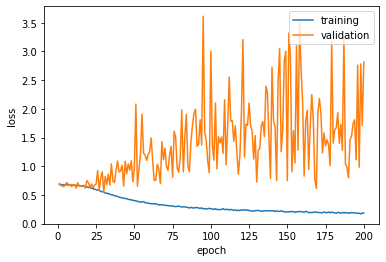

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()